# 2019 Electronic Sotore Sales Datasets EDA 

Sales analytics is the practice of generating insights from sales data, trends, and metrics to set targets and forecast future sales performance. Sales analysis is mining your data to evaluate the performance of your sales team against its goals. It provides insights about the top performing and underperforming products/services, the problems in selling and market opportunities, sales forecasting, and sales activities that generate revenue.

Order ID - An Order ID is the number system that Amazon uses exclusively to keep track of orders. Each order receives its own Order ID that will not be duplicated. This number can be useful to the seller when attempting to find out certain details about an order such as shipment date or status.
Product - The product that have been sold.
Quantity Ordered - Ordered Quantity is the total item quantity ordered in the initial order (without any changes).
Price Each - The price of each products.
Order Date - This is the date the customer is requesting the order be shipped.
Purchase Address - The purchase order is prepared by the buyer, often through a purchasing department. The purchase order, or PO, usually includes a PO number, which is useful in matching shipments with purchases; a shipping date; billing address; shipping address; and the request items, quantities and price.

## Questions

- what are the top five purchased products ?  
- what are the top purchased product in each state ? 
- which city generate the highest sales ?  
- trend of sales over time? 
- trend of sales in weekends and bussiness days ? 
- common products bought togather in the weekend ? 
- What time should we display adverstisement to maximize likelihood of customer's buying product?

### Import Necessary Libraries

In [55]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

%matplotlib inline


### Merging  the 12 months datasets into single dataset


i have 12 file that represent the sales of each month of year 2019. 

In [56]:
# Open the zip file
with zipfile.ZipFile("SalesDatasets.zip", "r") as zip_file:

    # Get a list of all the files in the zip file
    file_names = zip_file.namelist()

    # Iterate over the list of files and read each file as a Pandas DataFrame
    dataframes = []
    for file_name in file_names:
        dataframe = pd.read_csv(zip_file.open(file_name))
        dataframes.append(dataframe)

    # Close the zip file
    zip_file.close()

# Concatenate all the DataFrames into a single DataFrame
df = pd.concat(dataframes)
#reset index
df.reset_index(inplace=True)


In [57]:
# Print the combined DataFrame
df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [58]:
#checking the shape of the dataset 
df.shape

(186850, 7)

In [59]:
#Describe the DataFrame
df.describe()

,index
count,186850.000000
mean,8340.095419
std,5450.884089
min,0.000000
25%,3892.000000
50%,7785.000000
75%,11872.000000
max,25116.000000


In [60]:
#Print a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   index             186850 non-null  int64 
 1   Order ID          186305 non-null  object
 2   Product           186305 non-null  object
 3   Quantity Ordered  186305 non-null  object
 4   Price Each        186305 non-null  object
 5   Order Date        186305 non-null  object
 6   Purchase Address  186305 non-null  object
dtypes: int64(1), object(6)
memory usage: 10.0+ MB


# Data preprocessing 

### Uniqueness Categorical Variables

Let's have a look at categorical variables. How many unique values of these variables.


In [61]:
#getting the Uniqueness catrgorical variable
Objects = df.select_dtypes(['object']).columns 
for col in Objects:
    print(f'{col} : {df[col].nunique()} unique value(s)')

Order ID : 178438 unique value(s)
Product : 20 unique value(s)
Quantity Ordered : 10 unique value(s)
Price Each : 24 unique value(s)
Order Date : 142396 unique value(s)
Purchase Address : 140788 unique value(s)


### missing values
Let's check how many missing values do we have

In [62]:
df.isna().sum()

index                 0
Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

<AxesSubplot:>

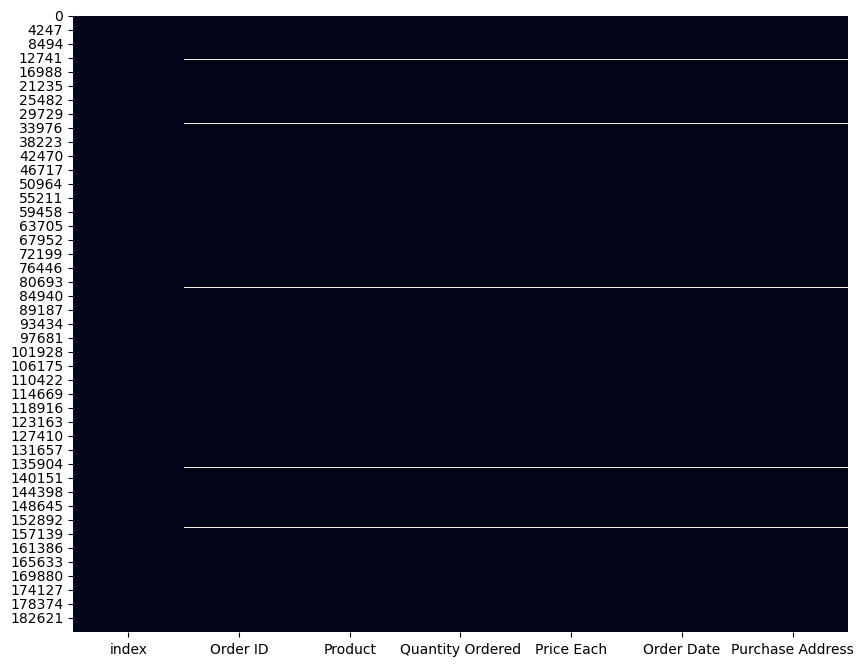

In [63]:
#visualize missing data
plt.figure(figsize=(10, 8))
# Define a function to annotate the missing values
sns.heatmap(df.isnull(),cbar=False)

As shown in the graph the missing values is relativly small  comapred to the total values,  so we will delete all the mssing values .

In [64]:
#Removing missing data 
df = df.dropna(axis=0)

### duplicate values

In [65]:
#count of duplicated data
df.duplicated().sum()

1

In [66]:
#drop the duplicate values 
df = df.drop_duplicates()

### Change the data types of data 

In [67]:
#Starting with column 'Quantity Ordered'
df['Quantity Ordered'].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

As show in the result there is a type error of the quantity order , since the values should be int not object

In [68]:
#chceking the rows that contains the value "Quantity Ordered" in column "Quantity Ordered"
df[df['Quantity Ordered']=='Quantity Ordered']

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...,...
185164,10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


As shown above there is a duplicate values of the column names in the data 

since the row that contains "Quantity Ordered" in column "Quantity Ordered" has no meaning, we will drop the row

In [69]:
# Create a boolean mask for the rows that you want to drop
condition = df['Quantity Ordered']=='Quantity Ordered'
boolean_mask = df.loc[condition]
# Drop the rows that match the boolean mask
df = df.drop(boolean_mask.index)


In [70]:
#change the data types of columns
df['Quantity Ordered']=df['Quantity Ordered'].astype('int')
df['Price Each']=df['Price Each'].astype('float')
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [71]:
#checking the data after the change of the data types 
df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [72]:
#shape of the data after the preproccessing 
df.shape

(185950, 7)

# Feature Creation  

### Extract  city and state from the Purchase Address 

In [73]:
#creating new columns
df['State']=df['Purchase Address'].apply(lambda x:x.strip().split(',')[2][:3])
df['City']=df['Purchase Address'].apply(lambda x:x.split(',')[1])


In [74]:
#checking the value counts of the newly created columns
df['City'].value_counts()

 San Francisco    44732
 Los Angeles      29605
 New York City    24876
 Boston           19934
 Atlanta          14881
 Dallas           14820
 Seattle          14732
 Portland         12465
 Austin            9905
Name: City, dtype: int64

In [75]:
#checking the value counts of the newly created columns
df['State'].value_counts()

 CA    74337
 NY    24876
 TX    24725
 MA    19934
 GA    14881
 WA    14732
 OR    10010
 ME     2455
Name: State, dtype: int64

### Extract  month and the day from the column 'Order Date'

In [76]:
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day

### Extract  total sales form the quantity * price each

In [77]:
#create column total sales 
df['Total Sales']=df['Quantity Ordered']*df['Price Each']

### drop Purchase Address 

In [78]:
# after extracting needed information from "Purchase Address" , we an savly drop it since we no longer need it .
df=df.drop('Purchase Address',axis=1)

# EDA 

### Q: what are the top five purchased products in all cities ?

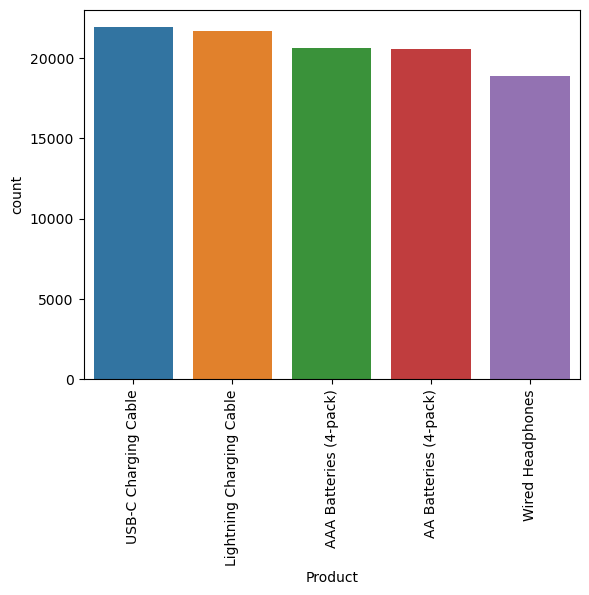

In [79]:
# count plot on single categorical variable
product_count=sns.countplot(x ='Product',order=df['Product'].value_counts()[0:5].index, data = df)
product_count.set_xticklabels(product_count.get_xticklabels(), rotation=90)
plt.show()

### Q: what are the top  purchased products in each state ?

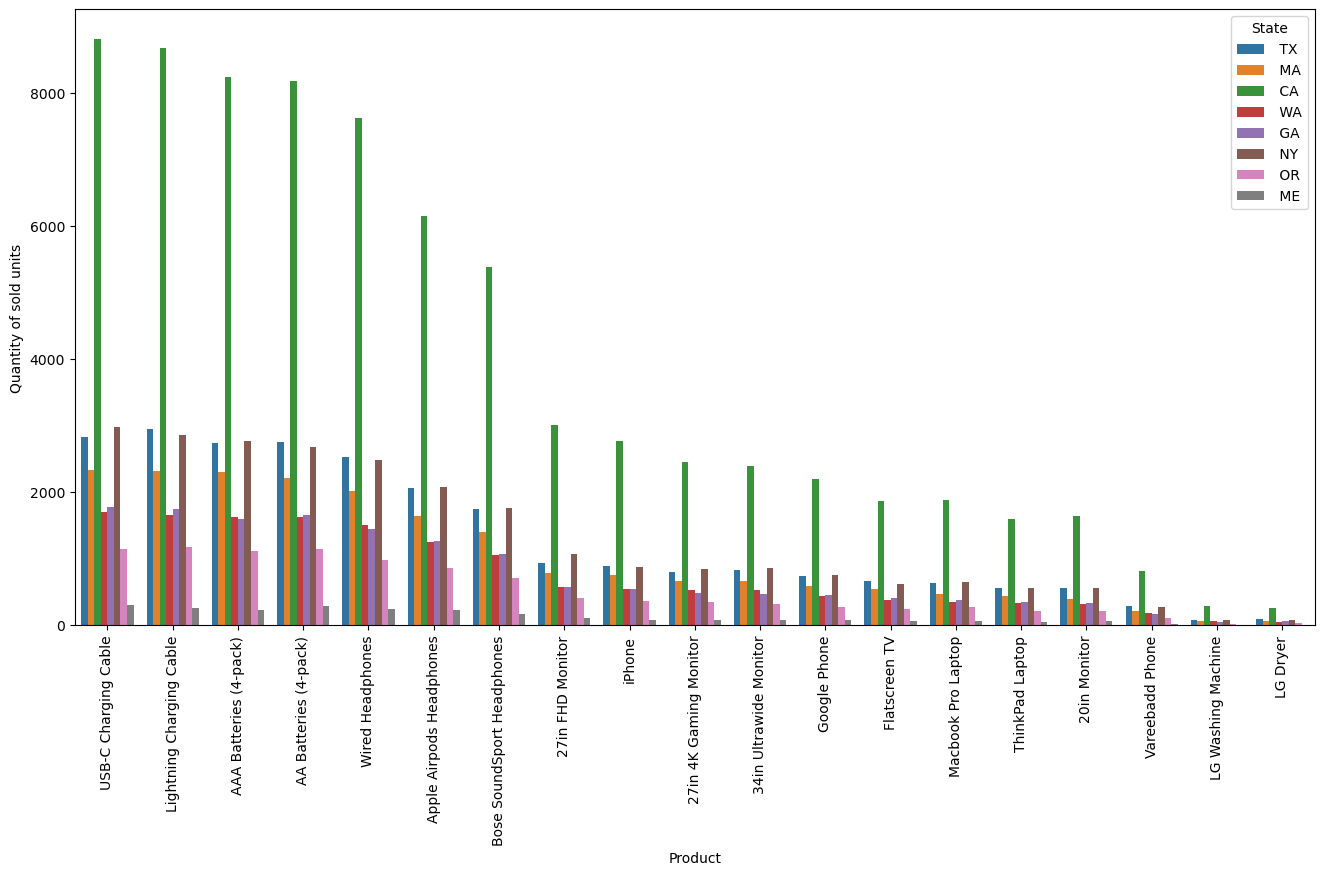

In [80]:
# Create a new figure object
fig, ax = plt.subplots(figsize=(16, 8))

# count plot on single categorical variable
productState=sns.countplot(x ='Product',order=df['Product'].value_counts().index, hue='State', data = df,ax=ax)
productState.set_xticklabels(productState.get_xticklabels(), rotation=90)
plt.ylabel("Quantity of sold units")
plt.show()



As shown in the graph the majority of the products sold in CA more than any other state 

### Q: which city generate the highest sales ?

In [81]:
City_TSales=df[['City','Total Sales']].groupby(by='City').sum().sort_values(by='Total Sales',ascending=False)
City_TSales

,Total Sales
City,
San Francisco,8262203.91
Los Angeles,5452570.80
New York City,4664317.43
Boston,3661642.01
Atlanta,2795498.58
Dallas,2767975.40
Seattle,2747755.48
Portland,2320490.61
Austin,1819581.75


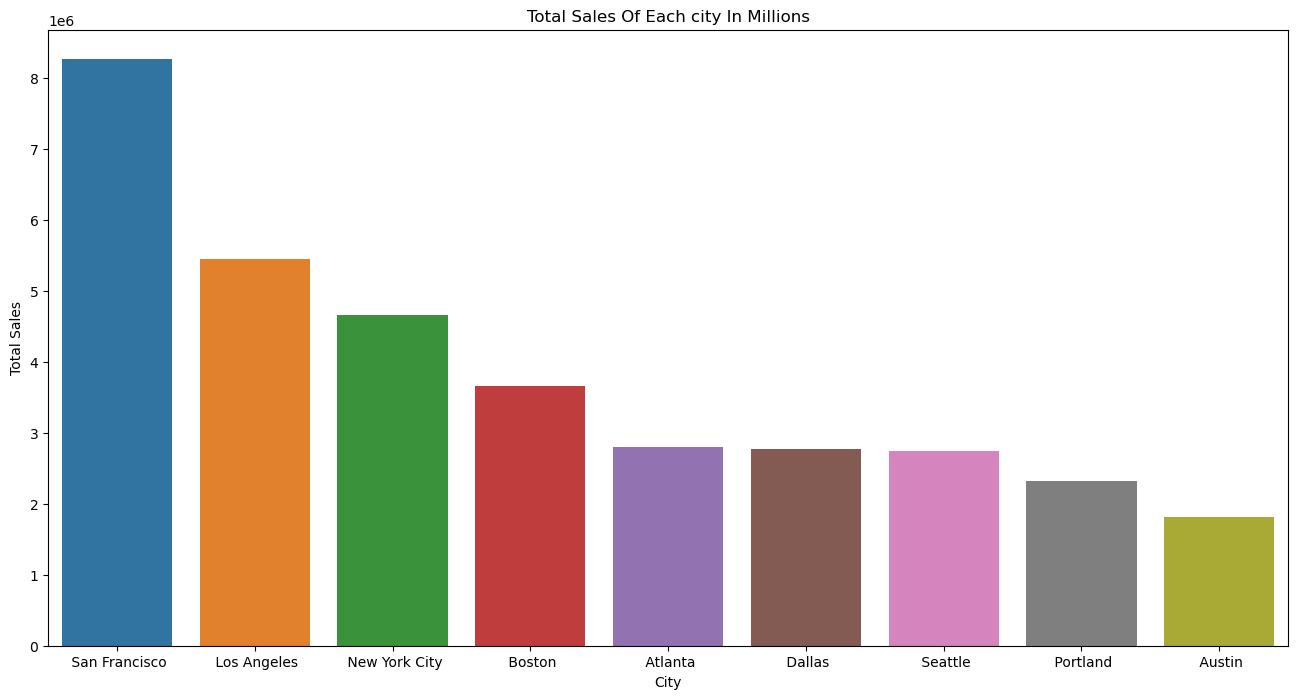

In [82]:
# Create a new figure object
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=City_TSales.index, y=City_TSales['Total Sales'], data=City_TSales,ax=ax)
plt.title('Total Sales Of Each city In Millions')
plt.show()

###### Answer:
The city that has the most sales data in the above visualization is San Francisco, with total sales reaching  $8,262,203
 .

### Q: Trend of sales over time .  

Text(0.5, 1.0, 'Trend of sales over time in 2019')

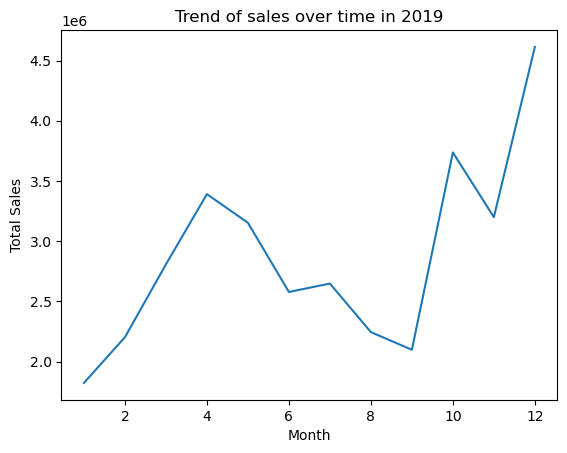

In [83]:
MonthTrend=df[['Month','Total Sales']].groupby(by='Month').sum().sort_values(by='Total Sales',ascending=False)
#visualize the result
sns.lineplot(x=MonthTrend.index, y=MonthTrend['Total Sales'], data=MonthTrend)
plt.title("Trend of sales over time in 2019")

##### Answer:
The best month to sell is shown in the visualization above is December which has a record number of sales reaching  $4,613,443 , this may due to long vications in December . also in december alot of people buy gits for their families .

### Q: Trend of sales in weekends and business days .

#### Weekends 

In [84]:
df["Is Weekend"] = df['Order Date'].dt.dayofweek > 5

In [85]:
groupedMW=df[['Month','Total Sales']][df['Is Weekend']==True]


In [86]:
groupedMW=(groupedMW.groupby('Month')['Total Sales'].sum())/8
groupedMW

Month
1     30728.84125
2     38665.27625
3     52491.71000
4     54760.38375
5     54595.90125
6     54562.30875
7     44539.55750
8     36127.82750
9     40828.61625
10    63283.36375
11    53646.96000
12    92290.46125
Name: Total Sales, dtype: float64

Text(0.5, 1.0, 'Average sales of weekends in each month')

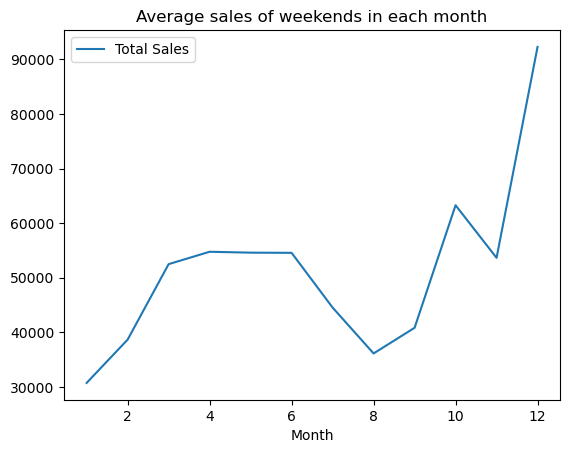

In [87]:
groupedMW.plot(kind='line', legend=True)
plt.title("Average sales of weekends in each month")


##### Answer:
as shown in the graph we can see the number of sales sarted to increase at the end of the year .

#### Business days

In [88]:
groupedMB=df[['Month','Total Sales']][df['Is Weekend']==False]
groupedMB=(groupedMB.groupby('Month')['Total Sales'].sum())/20
groupedMB


Month
1      78821.3000
2      94635.0105
3     119358.3350
4     147629.3585
5     135791.9770
6     107065.1895
7     114572.9650
8      97772.2630
9      88546.5600
10    161522.9985
11    138521.3760
12    193755.9825
Name: Total Sales, dtype: float64

Text(0.5, 1.0, 'Average sales of business days in each month')

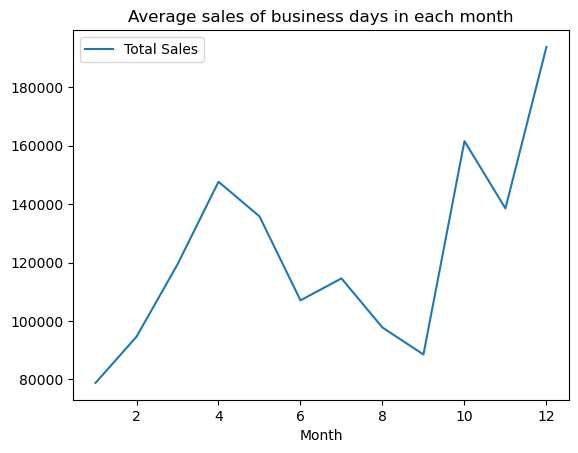

In [89]:
#plotting the result
groupedMB.plot(kind='line', legend=True)
plt.title("Average sales of business days in each month")

##### Answer:
as shown in the graph we can see the number of sales sarted to increase at the end of the year .

### Q: what is the common thing bought in the weekend ?

In [90]:
Weekend_Products=df[['Is Weekend', 'Product']].where(df['Is Weekend'] == True)['Product'].value_counts().to_frame()

Weekend_Products

,Product
USB-C Charging Cable,3128
Lightning Charging Cable,3127
AAA Batteries (4-pack),2921
AA Batteries (4-pack),2903
Wired Headphones,2707
Apple Airpods Headphones,2196
Bose SoundSport Headphones,1961
27in FHD Monitor,1101
iPhone,954
34in Ultrawide Monitor,888


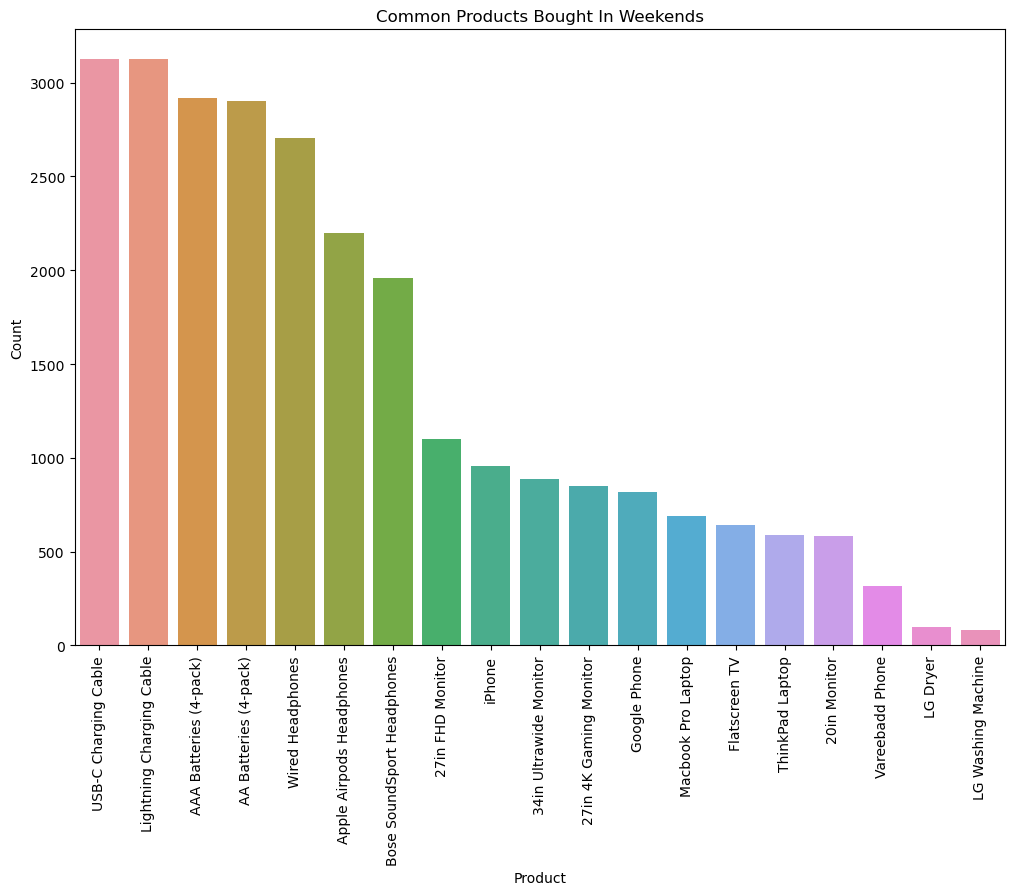

In [91]:
plt.figure(figsize=(12, 8))

# Create a bar plot
plotting=sns.barplot(x=Weekend_Products.index, y='Product', data=Weekend_Products)
plotting.set_xticklabels(plotting.get_xticklabels(), rotation=90)
plt.ylabel("Count")
plt.xlabel("Product")
plt.title("Common Products Bought In Weekends")

# Display the plot
plt.show()

### Q: Common products bought togather .  

In [92]:
df1 = (df.groupby('Order ID')['Product']
        .agg(frozenset)
        .value_counts()
        .rename(lambda x: ', '.join(sorted(x)))
        .rename_axis('bucket')
        .reset_index(name='count'))

df1=df1[df1['bucket'].str.contains(",")]

df1.sort_values(by='count',ascending=False).head()


,bucket,count
17,"Lightning Charging Cable, iPhone",895
18,"Google Phone, USB-C Charging Cable",869
21,"Wired Headphones, iPhone",374
22,"USB-C Charging Cable, Vareebadd Phone",318
23,"Google Phone, Wired Headphones",311


Products that are often sold simultaneously are iPhone and Lightning Charging Cable which sold  895
  orders, and Google Phone, USB-C Charging Cable ranked second with  869
  orders.

#### before exporting the file i want to create another column for the category of the products to be used in power bi 

In [93]:
df.to_csv(r"C:\Users\Lenovo\Documents\TotalSales.csv")

In [94]:
df.Product.unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

we have 8 product category and they are :  
Chargers 
Headphone
Phones
Laptops
Monitors
Batteries
Dryers
Washing Machines


In [95]:
def product_category(x):
    cat=""
    x=x.lower()
    if "charging" in x:
        cat="Chargers"
    elif "headphones" in x:
        cat="Headphones"
    elif "monitor" in x:
        cat="Monitors"
    elif "phone" in x:
        cat="Phones"
    elif "laptop" in x:
        cat="Laptops"
    elif "batteries" in x:
        cat="Batteries"
    elif "dryer" in x :
        cat="Dryers"
    elif "washing machine" in x :
        cat="Washing Machines"
    elif "tv" in x :
        cat="TV"
    else :
        return None 
    return cat
    

In [96]:
#apply function to "Product" column
df['Product Category']=df['Product'].apply(product_category)

In [97]:
#Export the clean dataFrame to csv file 
df.to_csv(r"C:\Users\Lenovo\Documents\TotalSalesCleaned.csv")